# Acknowledgements

This code was mostly written by following the Medium guide "Text classification using CNN". This CNN is trained on the IMDB large movie review dataset. The sample text in the last codeblock can be changed to any movie review. The CNN will then output whether it's a positive or a negative review.

---

### Sources
Choubey, V. (2020, July 22). *Text classification using CNN*. Medium. Retrieved from https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9 

Maas, A., Daly, R., Pham, P., Huang, D., Ng, A., & Potts, C. (2011). Learning Word Vectors for Sentiment Analysis. In *Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies* (pp. 142–150). Association for Computational Linguistics.

Mattoo, A. (2020, June 10). CNN_predict. Retrieved from https://github.com/matakshay/IMDB_Sentiment_Analysis/blob/master/CNN_predict.py. 

TensorFlow Developers. (2023, March). Version (v2.12.0). *TensorFlow*. Zenodo. Retrieved from https://doi.org/10.5281/zenodo.7764425. 

# Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=7000)

17464789/17464789 [==============================] - 1s 0us/step


# Text padding

In [3]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=450)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=450)

# Model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(7000, 32, input_length=450),
    tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [5]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=128, verbose=2)

Epoch 1/10
196/196 - 35s - loss: 0.4755 - accuracy: 0.7382 - val_loss: 0.3143 - val_accuracy: 0.8672 - 35s/epoch - 178ms/step
Epoch 2/10
196/196 - 31s - loss: 0.2065 - accuracy: 0.9211 - val_loss: 0.2682 - val_accuracy: 0.8900 - 31s/epoch - 157ms/step
Epoch 3/10
196/196 - 33s - loss: 0.1375 - accuracy: 0.9500 - val_loss: 0.3039 - val_accuracy: 0.8820 - 33s/epoch - 170ms/step
Epoch 4/10
196/196 - 32s - loss: 0.0860 - accuracy: 0.9724 - val_loss: 0.3759 - val_accuracy: 0.8738 - 32s/epoch - 162ms/step
Epoch 5/10
196/196 - 33s - loss: 0.0432 - accuracy: 0.9886 - val_loss: 0.4789 - val_accuracy: 0.8693 - 33s/epoch - 167ms/step
Epoch 6/10
196/196 - 32s - loss: 0.0154 - accuracy: 0.9972 - val_loss: 0.5793 - val_accuracy: 0.8719 - 32s/epoch - 162ms/step
Epoch 7/10
196/196 - 37s - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.6734 - val_accuracy: 0.8692 - 37s/epoch - 188ms/step
Epoch 8/10
196/196 - 32s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7354 - val_accuracy: 0.8708 - 32s/epoch - 162

In [6]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 0.8733287453651428
Test Accuracy: 0.8698400259017944


(0.0, 0.9169729351691785)

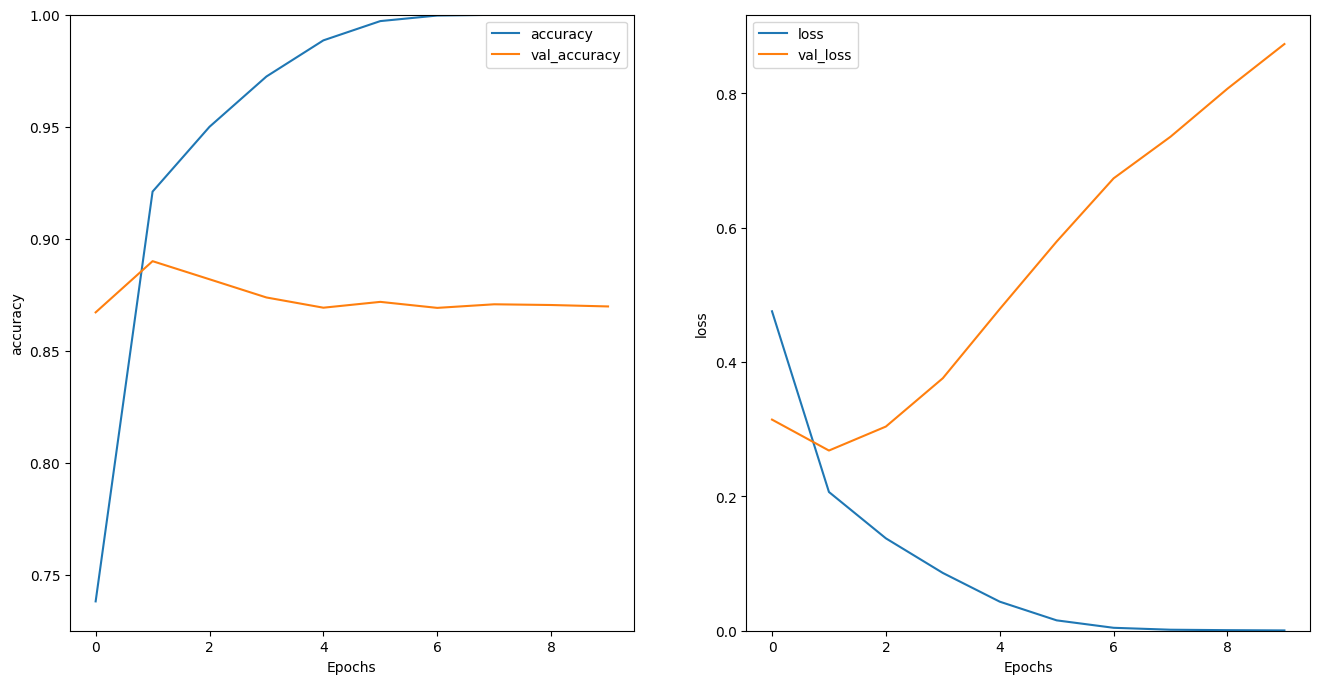

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [13]:
sample_text = ('Amazing movie! 10/10, would recommend.')
word_to_index = tf.keras.datasets.imdb.get_word_index()
tokenized_review = [word.lower() for word in sample_text.split()]
text_indices = [word_to_index[word]+3 for word in tokenized_review if word in word_to_index.keys()]
model_input = [text_indices]
model_input = tf.keras.preprocessing.sequence.pad_sequences(model_input, maxlen=450)
prediction = model.predict(model_input, verbose = 0)
if prediction >= 0.5:
  print("positive")
else:
  print("negative")

positive


In [14]:
sample_text = ('This movie sucked. My time would\'ve been spent better watching paint dry.')
word_to_index = tf.keras.datasets.imdb.get_word_index()
tokenized_review = [word.lower() for word in sample_text.split()]
text_indices = [word_to_index[word]+3 for word in tokenized_review if word in word_to_index.keys()]
model_input = [text_indices]
model_input = tf.keras.preprocessing.sequence.pad_sequences(model_input, maxlen=450)
prediction = model.predict(model_input, verbose = 0)
if prediction >= 0.5:
  print("positive")
else:
  print("negative")

negative
